In [1]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
from google.colab import files
upload = files.upload()

Saving air-quality-london-monthly-averages.csv to air-quality-london-monthly-averages.csv
Saving air-quality-london-time-of-day (1).csv to air-quality-london-time-of-day (1).csv


1. Deal with missing entries in both datasets by:
  *  Display, in the form of a dataframe, the number of missing values
  in each feature.
  * Deleting features where the number of missing values exceed 10%
  of the total sample size.

In [26]:
data_path1 = 'air-quality-london-time-of-day (1).csv'
data_path2 = 'air-quality-london-monthly-averages.csv'
data1 = pd.read_csv(data_path1,  header=0)
data2 = pd.read_csv(data_path2,  header=0)

In [27]:
data1.columns = ["Date","Time",
             "RNO", "RNO2","RNOx","RO3","RPM10","RPM2.5","RSO2",
             "BNO", "BNO2","BNOx","BO3","BPM10","BPM2.5","BSO2"]
print("number of rows:", data1.shape[0], "number of columns:", data1.shape[1])

data2.columns = ["Date",
             "RNO", "RNO2","RNOx","RO3","RPM10","RPM2.5","RSO2",
             "BNO", "BNO2","BNOx","BO3","BPM10","BPM2.5","BSO2"]
print("number of rows:", data2.shape[0], "number of columns:", data2.shape[1])

number of rows: 3336 number of columns: 16
number of rows: 139 number of columns: 15


In [28]:
data1

,Date,Time,RNO,RNO2,RNOx,RO3,RPM10,RPM2.5,RSO2,BNO,BNO2,BNOx,BO3,BPM10,BPM2.5,BSO2
0,Jan-08,00:00,NaN,42.3,NaN,32.6,23.0,15.5,3.4,NaN,34.2,NaN,41.8,19.2,.,3.1
1,Jan-08,01:00,NaN,33.8,NaN,35.3,21.2,13.5,2.6,NaN,29.0,NaN,45.3,18.9,.,3.1
2,Jan-08,02:00,NaN,28.8,NaN,43.2,19.6,12.7,2.1,NaN,25.4,NaN,46.6,17.7,.,3.3
3,Jan-08,03:00,NaN,27.3,NaN,42.4,18.3,11.9,2.0,NaN,23.4,NaN,46.6,16.4,.,3.3
4,Jan-08,04:00,NaN,29.4,NaN,40.1,18.1,12.0,2.2,NaN,24.2,NaN,45.2,16.0,.,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3331,Jul-19,19:00,18.6,37.7,66.3,34.4,18.5,10.1,5.1,3.6,19.7,22.8,60.6,14.4,9.1,2.5
3332,Jul-19,20:00,17.7,38.3,65.5,31.8,18.4,10.8,5.0,3.2,21.0,23.9,55.8,13.8,9.4,2.5
3333,Jul-19,21:00,18.2,39.4,67.3,29.4,18.5,10.7,5.8,3.2,23.0,26.2,50.4,14.2,9.5,2.5
3334,Jul-19,22:00,16.0,37.5,62.0,28.4,18.0,9.6,5.7,3.1,22.5,25.7,46.7,14.5,9.4,2.5


In [29]:
data2

,Date,RNO,RNO2,RNOx,RO3,RPM10,RPM2.5,RSO2,BNO,BNO2,BNOx,BO3,BPM10,BPM2.5,BSO2
0,Jan-08,NaN,55.5,NaN,29.5,25.0,14.7,4.2,NaN,42.3,NaN,36.9,18.8,.,3.6
1,Feb-08,NaN,75.9,NaN,20.3,39.5,28.8,7.6,NaN,60.2,NaN,26.4,31.9,.,6.7
2,Mar-08,NaN,55.6,NaN,40.1,21.6,12.3,3.9,NaN,39.8,NaN,50.2,15.5,.,2.3
3,Apr-08,NaN,61.8,NaN,37.9,28.7,20.5,4.5,NaN,44.0,NaN,50.1,21.7,.,3.2
4,May-08,NaN,62.9,NaN,46.3,34.6,27.5,4.6,NaN,44.1,NaN,60.5,29.5,16.6,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Mar-19,31.0,42.6,90.0,34.9,20.9,11.3,4.9,7.7,25.7,36.0,52.7,16.6,10.9,2.3
135,Apr-19,25.2,46.2,84.9,38.1,32.3,22.8,12.4,6.9,31.5,39.9,54.7,29.2,23.1,2.8
136,May-19,24.7,39.7,77.5,35.7,19.5,10.7,11.5,5.5,22.4,29.3,53.7,15.3,10.9,1.5
137,Jun-19,22.0,34.9,68.6,31.4,18.0,9.2,4.5,5.0,19.4,24.9,51.8,14.1,9.5,1.8


In [30]:
data1.isnull().sum()

Date        0
Time        0
RNO       576
RNO2        0
RNOx      576
RO3         0
RPM10       0
RPM2.5      0
RSO2        0
BNO       576
BNO2        0
BNOx      576
BO3         0
BPM10       0
BPM2.5      0
BSO2        0
dtype: int64

In [31]:
data2.isnull().sum()

Date       0
RNO       24
RNO2       0
RNOx      24
RO3        0
RPM10      0
RPM2.5     0
RSO2       0
BNO       24
BNO2       0
BNOx      24
BO3        0
BPM10      0
BPM2.5     0
BSO2       0
dtype: int64

In [33]:
data1.isnull().sum()/len(data1)*100

Date       0.000000
Time       0.000000
RNO       17.266187
RNO2       0.000000
RNOx      17.266187
RO3        0.000000
RPM10      0.000000
RPM2.5     0.000000
RSO2       0.000000
BNO       17.266187
BNO2       0.000000
BNOx      17.266187
BO3        0.000000
BPM10      0.000000
BPM2.5     0.000000
BSO2       0.000000
dtype: float64

In [35]:
data2.isnull().sum()/len(data2)*100

Date       0.000000
RNO       17.266187
RNO2       0.000000
RNOx      17.266187
RO3        0.000000
RPM10      0.000000
RPM2.5     0.000000
RSO2       0.000000
BNO       17.266187
BNO2       0.000000
BNOx      17.266187
BO3        0.000000
BPM10      0.000000
BPM2.5     0.000000
BSO2       0.000000
dtype: float64

In [36]:
delete_columns = data1.columns[data1.isnull().sum()/len(data1)*100 > 10]
delete_columns

Index(['RNO', 'RNOx', 'BNO', 'BNOx'], dtype='object')

In [37]:
delete_columns2 = data2.columns[data2.isnull().sum()/len(data2)*100 > 10]
delete_columns2

Index(['RNO', 'RNOx', 'BNO', 'BNOx'], dtype='object')

In [38]:
data1.drop(delete_columns, axis=1, inplace=True)
data2.drop(delete_columns2, axis=1, inplace=True)


In [39]:
data1.loc[:,'Datetime'] = data1['Date'] + ' ' + data1['Time']
data1['Datetime']=pd.to_datetime(data1.Datetime,  format='%b-%y %H:%M')
datetime = pd.Series(data1.Datetime)
data1.index = datetime
data1.head()

,Date,Time,RNO2,RO3,RPM10,RPM2.5,RSO2,BNO2,BO3,BPM10,BPM2.5,BSO2,Datetime
Datetime,,,,,,,,,,,,,
2008-01-01 00:00:00,Jan-08,00:00,42.3,32.6,23.0,15.5,3.4,34.2,41.8,19.2,.,3.1,2008-01-01 00:00:00
2008-01-01 01:00:00,Jan-08,01:00,33.8,35.3,21.2,13.5,2.6,29.0,45.3,18.9,.,3.1,2008-01-01 01:00:00
2008-01-01 02:00:00,Jan-08,02:00,28.8,43.2,19.6,12.7,2.1,25.4,46.6,17.7,.,3.3,2008-01-01 02:00:00
2008-01-01 03:00:00,Jan-08,03:00,27.3,42.4,18.3,11.9,2.0,23.4,46.6,16.4,.,3.3,2008-01-01 03:00:00
2008-01-01 04:00:00,Jan-08,04:00,29.4,40.1,18.1,12.0,2.2,24.2,45.2,16.0,.,2.8,2008-01-01 04:00:00


In [40]:
data2.loc[:,'Datetime'] = data2['Date']
data2['Datetime']=pd.to_datetime(data2.Datetime,  format='%b-%y')
datetime = pd.Series(data2.Datetime)
data2.index = datetime
data2.head()

,Date,RNO2,RO3,RPM10,RPM2.5,RSO2,BNO2,BO3,BPM10,BPM2.5,BSO2,Datetime
Datetime,,,,,,,,,,,,
2008-01-01,Jan-08,55.5,29.5,25.0,14.7,4.2,42.3,36.9,18.8,.,3.6,2008-01-01
2008-02-01,Feb-08,75.9,20.3,39.5,28.8,7.6,60.2,26.4,31.9,.,6.7,2008-02-01
2008-03-01,Mar-08,55.6,40.1,21.6,12.3,3.9,39.8,50.2,15.5,.,2.3,2008-03-01
2008-04-01,Apr-08,61.8,37.9,28.7,20.5,4.5,44.0,50.1,21.7,.,3.2,2008-04-01
2008-05-01,May-08,62.9,46.3,34.6,27.5,4.6,44.1,60.5,29.5,16.6,4.3,2008-05-01


In [41]:
print("Number of rows:", data1.shape[0], "Number of columns:", data1.shape[1])
data1['BPM2.5'].replace('.', np.nan,inplace = True)
data1['BPM2.5'] = data1['BPM2.5'].astype(float)

Number of rows: 3336 Number of columns: 13


In [42]:
print("Number of rows:", data2.shape[0], "Number of columns:", data2.shape[1])
data2['BPM2.5'].replace('.', np.nan,inplace = True)
data2['BPM2.5'] = data2['BPM2.5'].astype(float)

Number of rows: 139 Number of columns: 12


2. Use the necessary Exploratory Data Analysis techniques of the target
variable to check the following:
  * Autocorrelation.
  * Seasonality.
  * Stationarity.

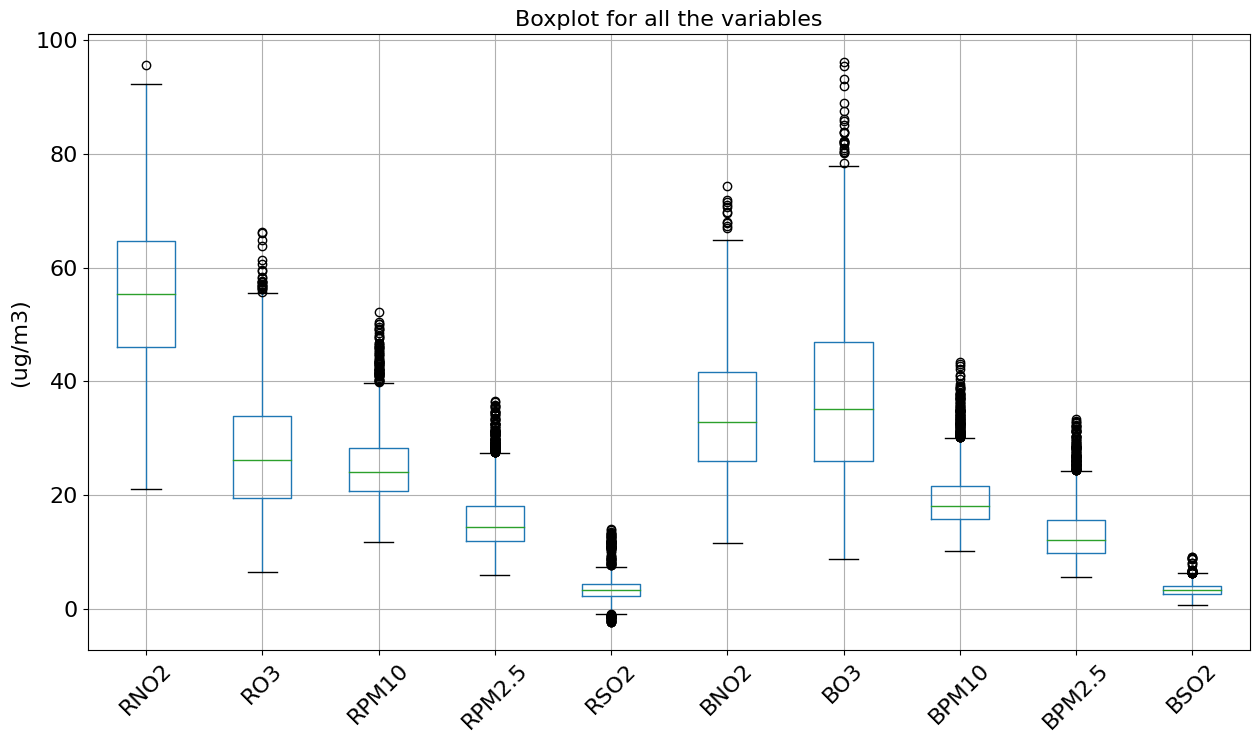

In [47]:
boxplot = data1.boxplot( figsize=(15, 8), rot=45, fontsize=16)
plt.title('Boxplot for all the variables',fontsize=16)
plt.ylabel('(ug/m3)', fontsize=16)
plt.show()

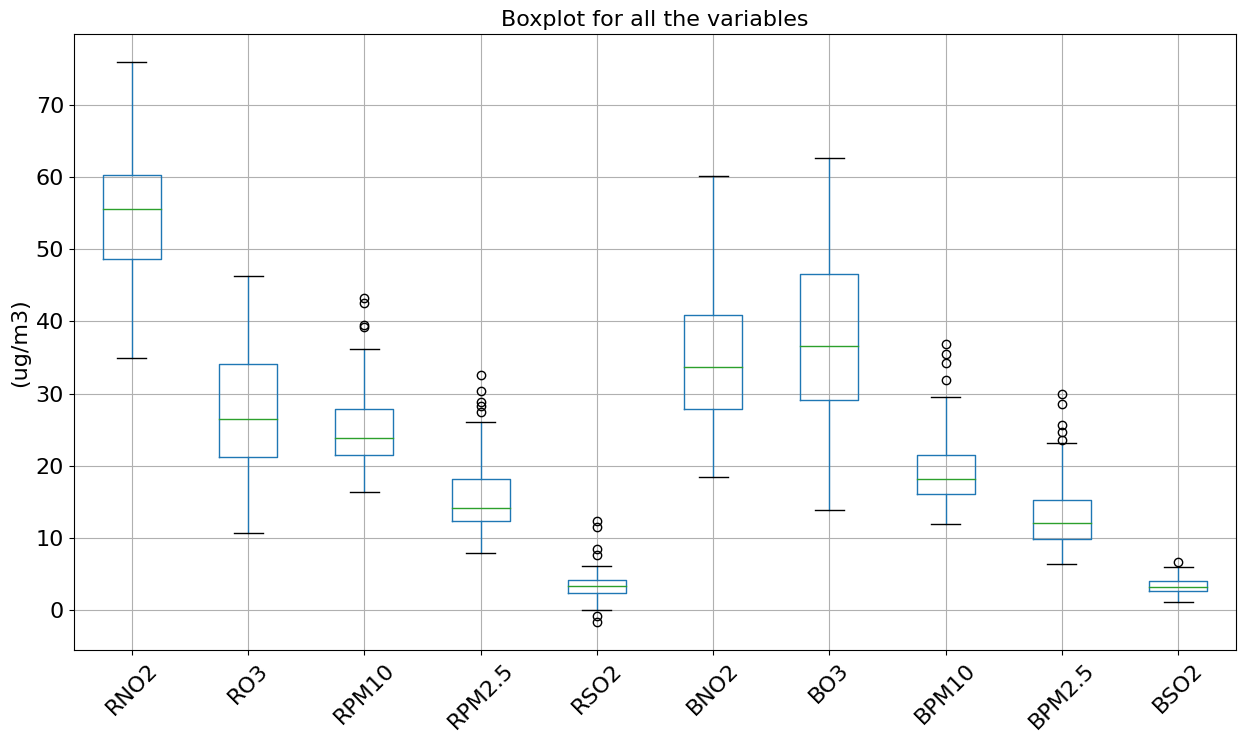

In [48]:
boxplot = data2.boxplot( figsize=(15, 8), rot=45, fontsize=16)
plt.title('Boxplot for all the variables',fontsize=16)
plt.ylabel('(ug/m3)', fontsize=16)
plt.show()

<ipython-input-49-4c17f8eda855>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data1.corr(),annot=True,cmap='viridis')


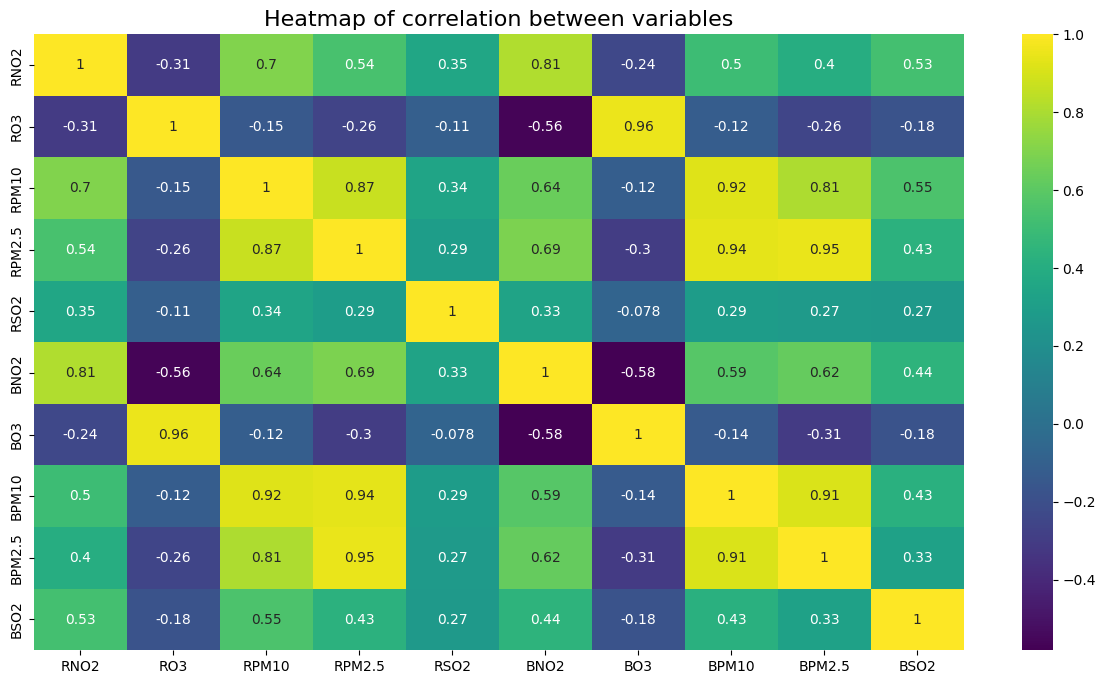

In [49]:
rcParams['figure.figsize']=15,8
sns.heatmap(data1.corr(),annot=True,cmap='viridis')
plt.title('Heatmap of correlation between variables',fontsize=16)
plt.show()

<ipython-input-50-c44e58a4b0a0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data2.corr(),annot=True,cmap='viridis')


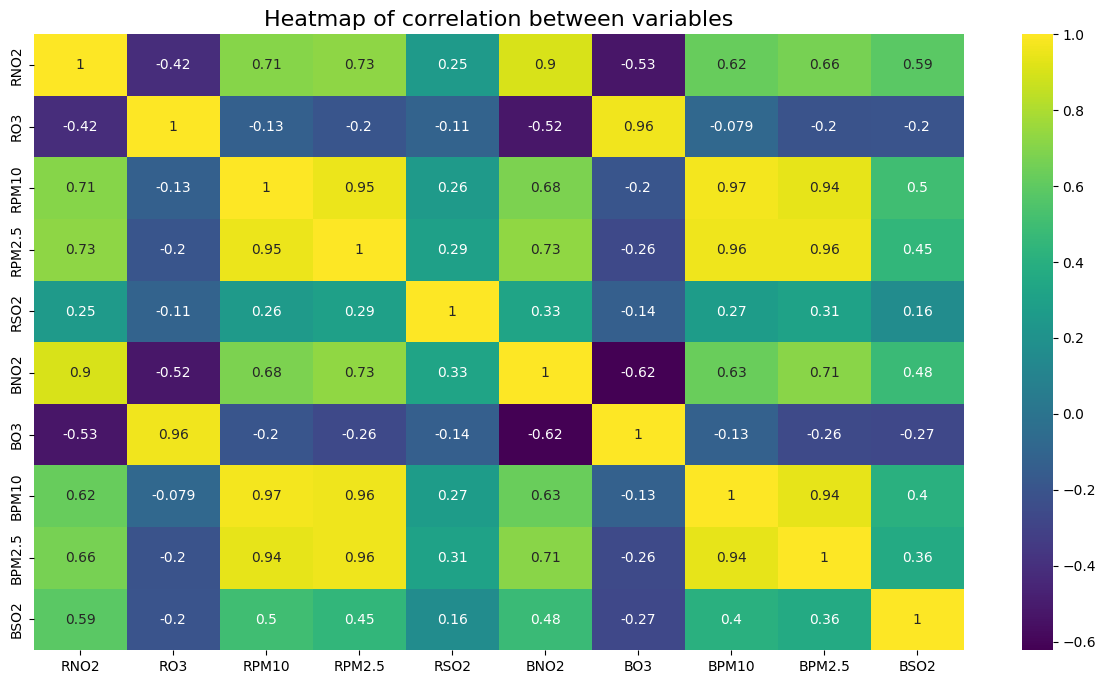

In [50]:
rcParams['figure.figsize']=15,8
sns.heatmap(data2.corr(),annot=True,cmap='viridis')
plt.title('Heatmap of correlation between variables',fontsize=16)
plt.show()

In [51]:
correlations_data1 = data1.corr()['RO3'].sort_values()
correlations_data1

<ipython-input-51-c5838b793a40>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_data1 = data1.corr()['RO3'].sort_values()


BNO2     -0.563911
RNO2     -0.308505
RPM2.5   -0.263575
BPM2.5   -0.259265
BSO2     -0.176640
RPM10    -0.148450
BPM10    -0.122588
RSO2     -0.108712
BO3       0.955920
RO3       1.000000
Name: RO3, dtype: float64

In [52]:
correlations_data2 = data2.corr()['RO3'].sort_values()
correlations_data2

<ipython-input-52-52b78eaa5a84>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_data2 = data2.corr()['RO3'].sort_values()


BNO2     -0.524205
RNO2     -0.418584
BPM2.5   -0.204564
BSO2     -0.201294
RPM2.5   -0.196922
RPM10    -0.134191
RSO2     -0.111672
BPM10    -0.079428
BO3       0.962091
RO3       1.000000
Name: RO3, dtype: float64

In [53]:
df1 = pd.DataFrame({'O3':data1.RO3})
df2 = pd.DataFrame({'O3':data2.RO3})

In [43]:
import statsmodels
from statsmodels.tsa.stattools import coint, adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

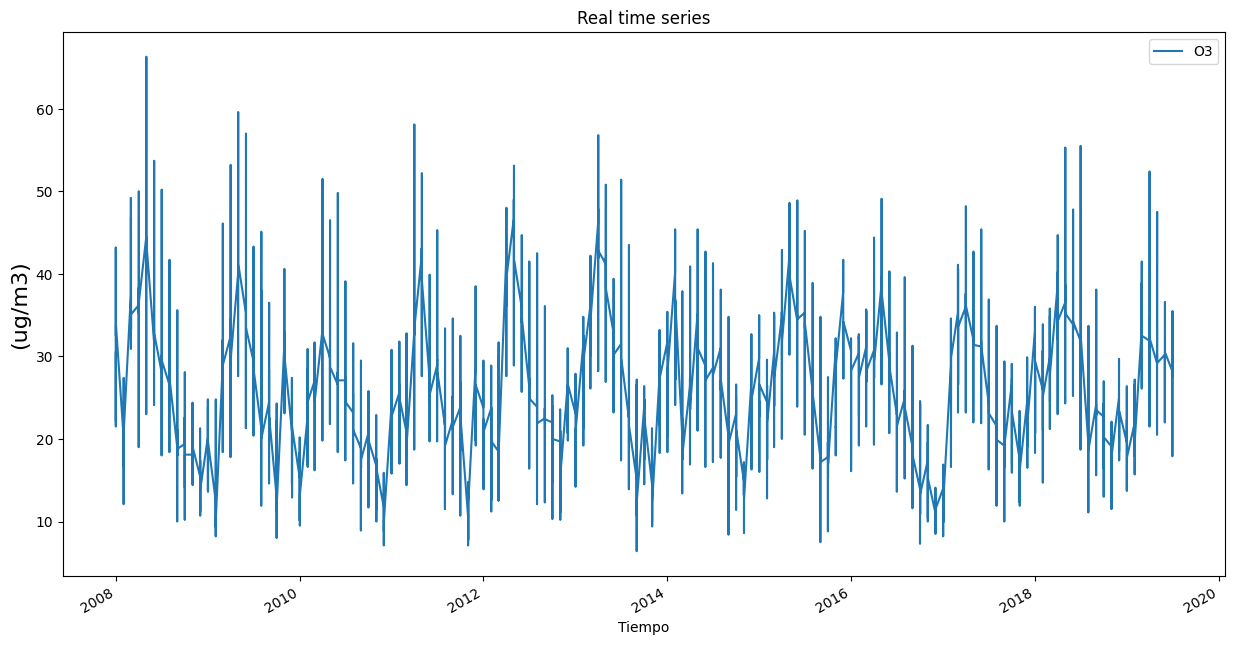

In [54]:
df1_O3 = df1[["O3"]].copy()
df1_O3.plot()
plt.title('Real time series')
plt.xlabel('Tiempo')
plt.ylabel('(ug/m3)', fontsize=16)
plt.show()

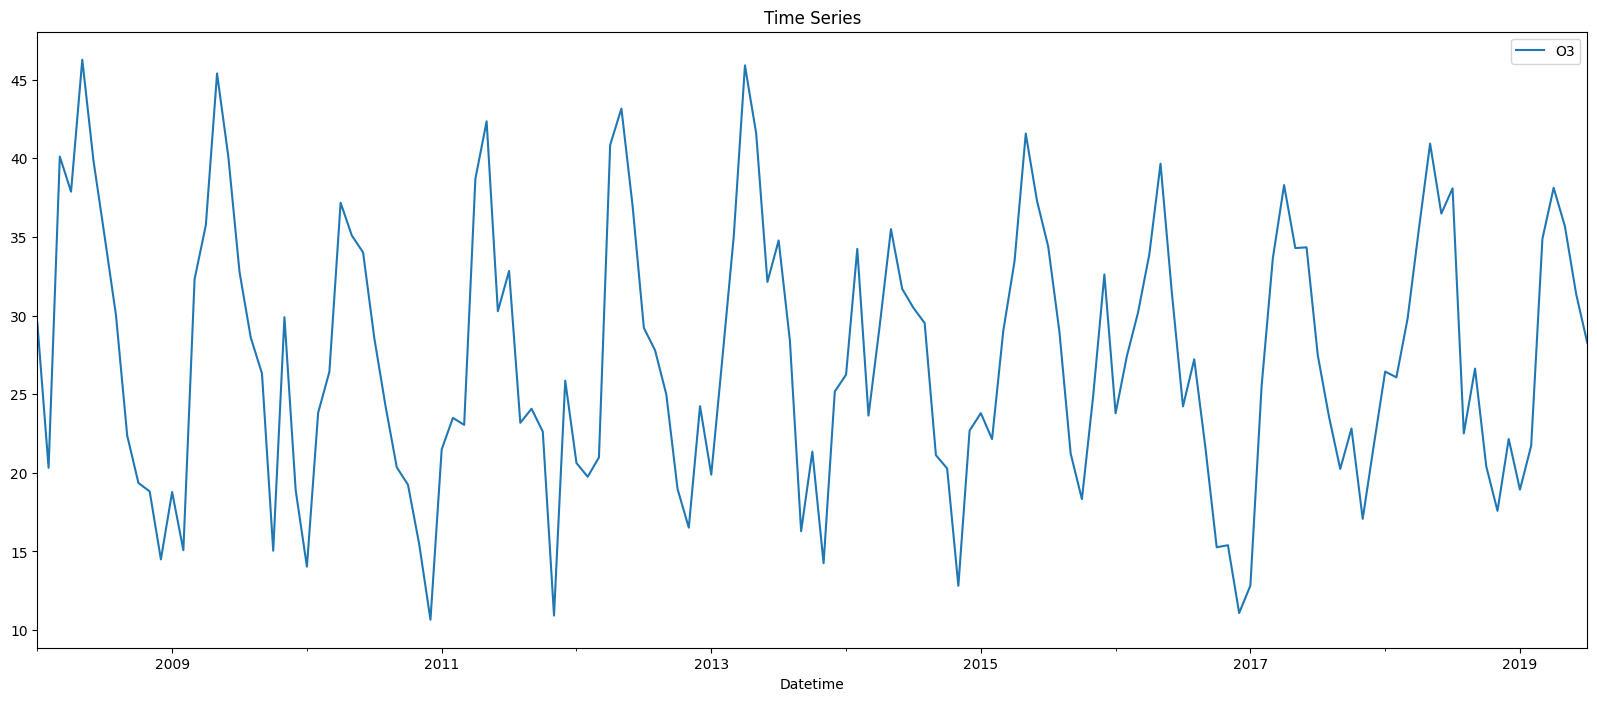

In [55]:
df1_o3_resample = df1_O3.resample(rule = "M").mean().ffill()
df1_o3_resample.plot(figsize = (20,8))
plt.title("Time Series")
plt.legend()
plt.show()

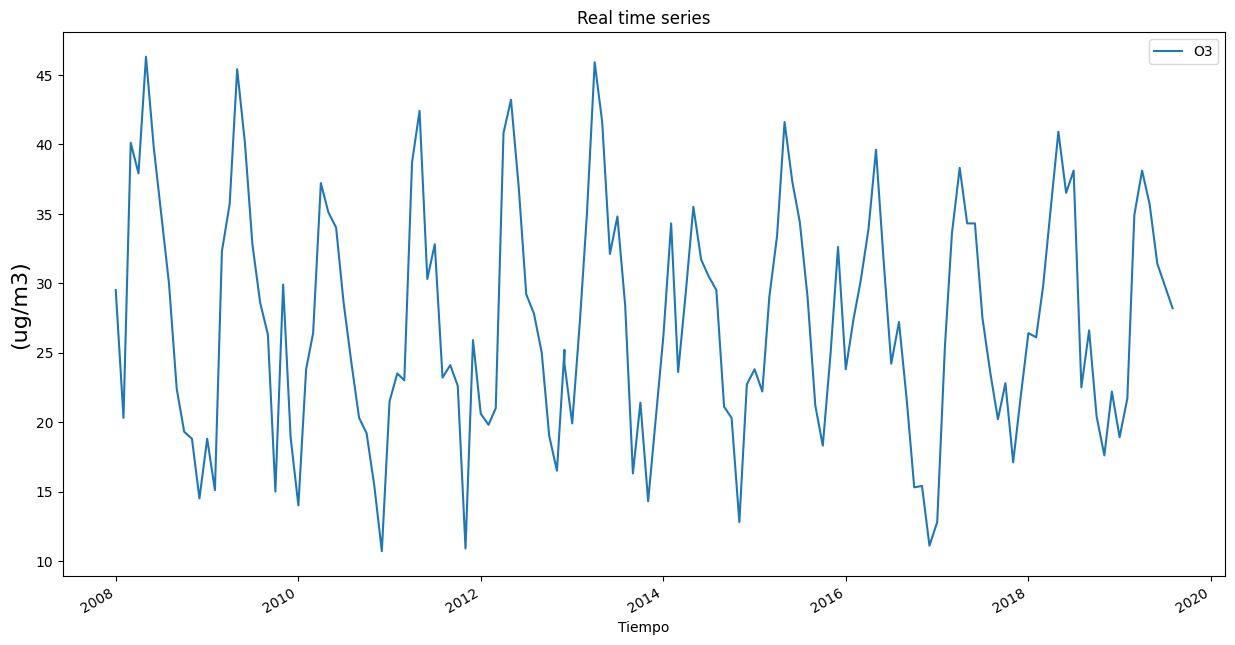

In [56]:
df2_O3 = df2[["O3"]].copy()
df2_O3.plot()
plt.title('Real time series')
plt.xlabel('Tiempo')
plt.ylabel('(ug/m3)', fontsize=16)
plt.show()

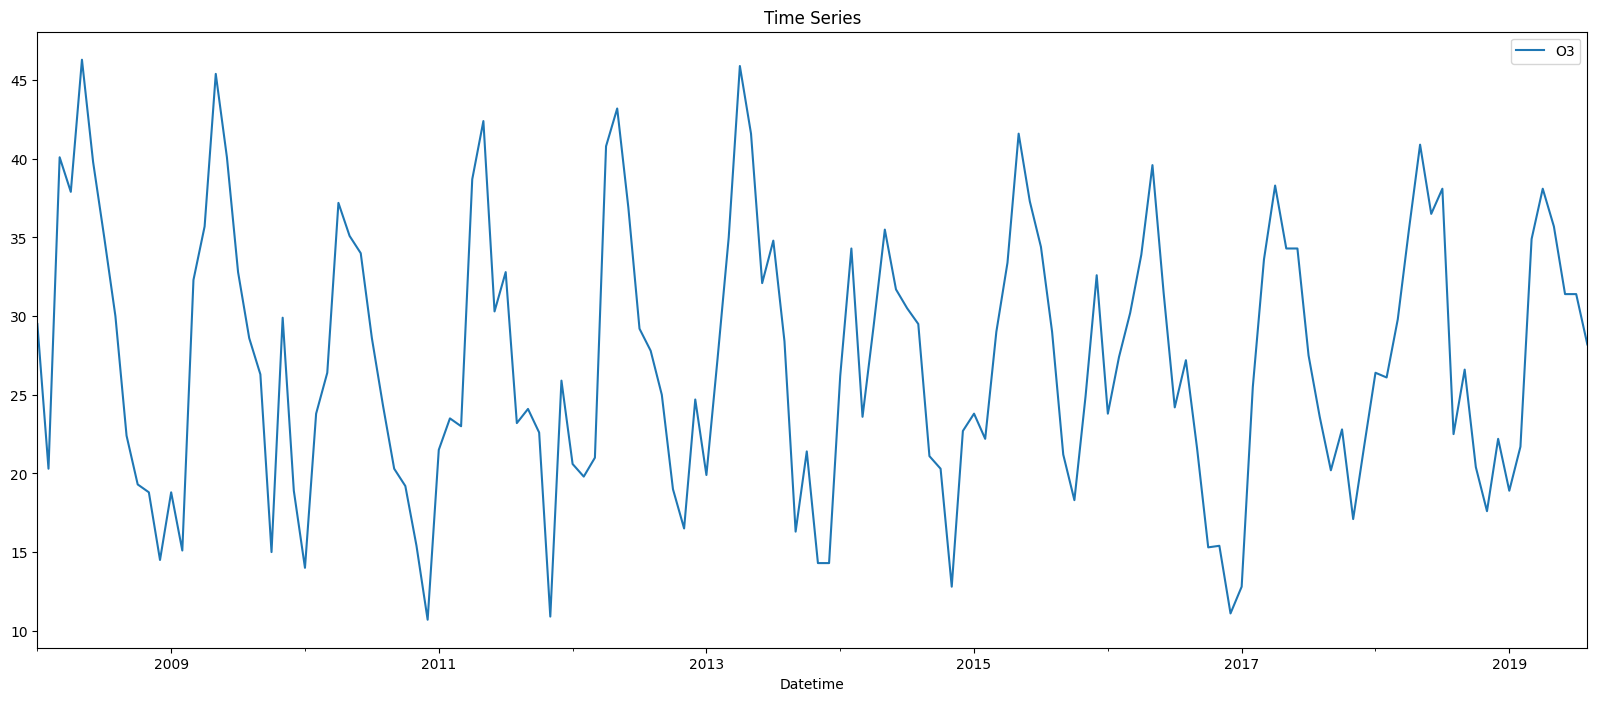

In [57]:
df2_o3_resample = df2_O3.resample(rule = "M").mean().ffill()
df2_o3_resample.plot(figsize = (20,8))
plt.title("Time Series")
plt.legend()
plt.show()

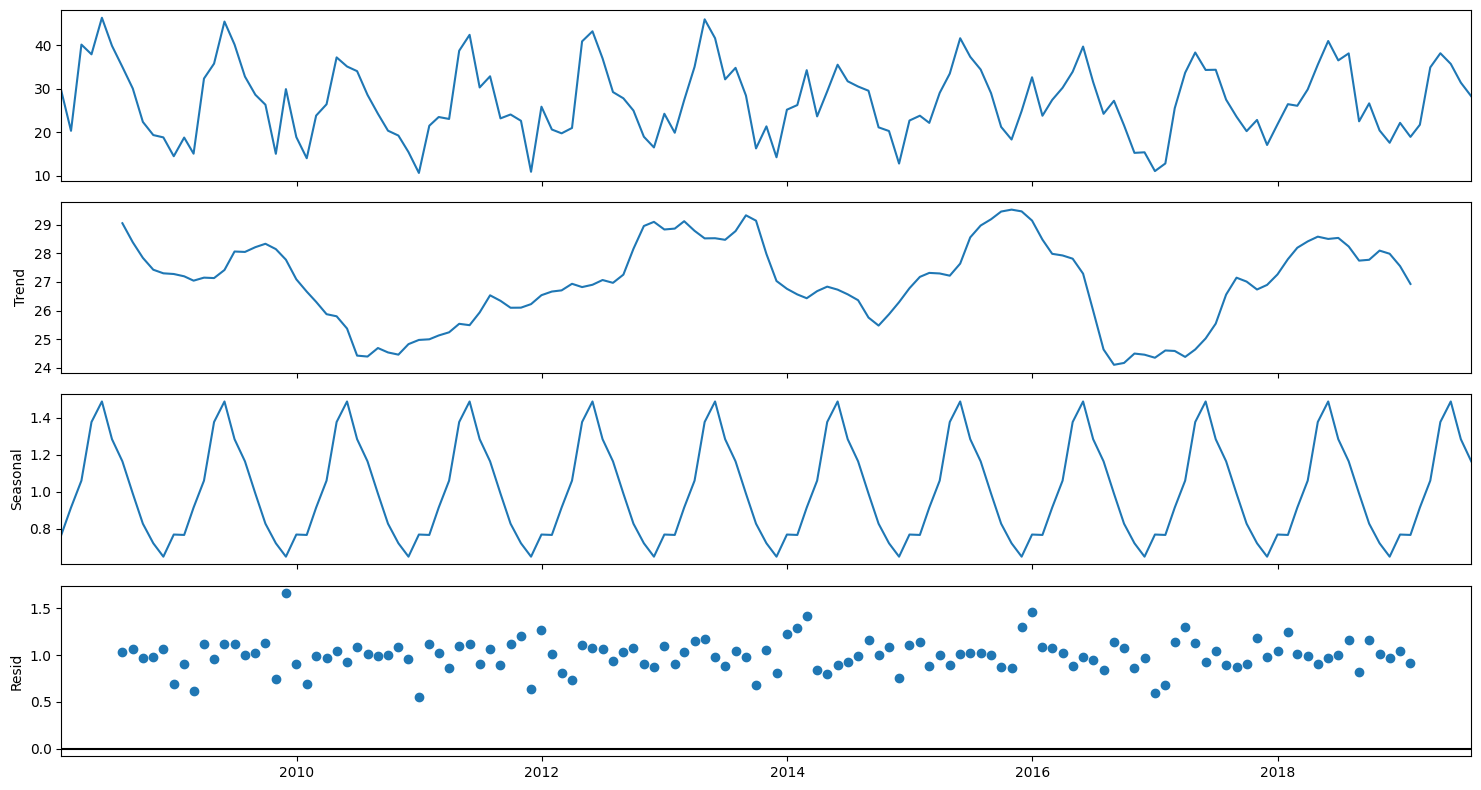

In [59]:
result1 = seasonal_decompose(df1_o3_resample, model = "multiplicative")
fig = result1.plot()
plt.show()

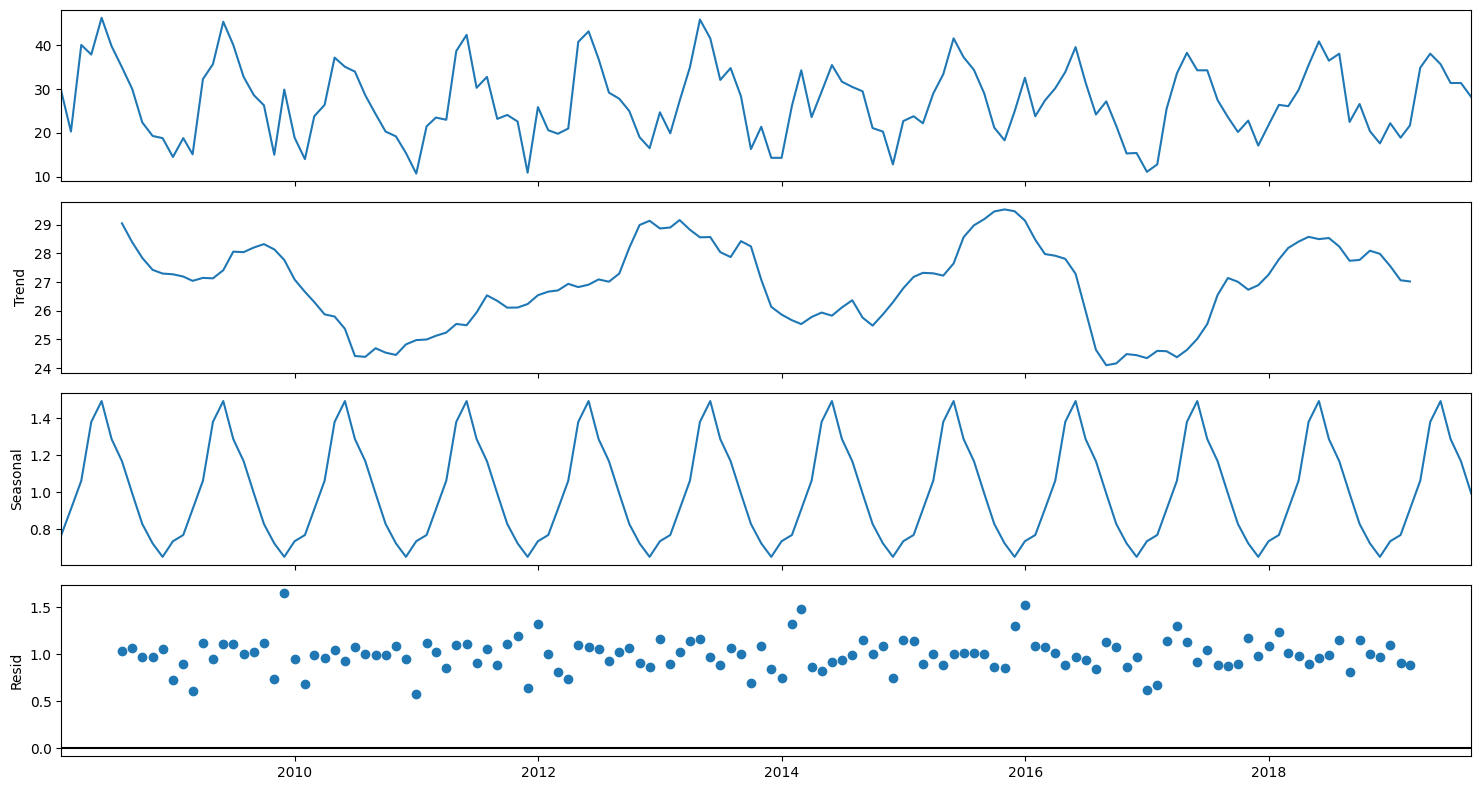

In [60]:
result2 = seasonal_decompose(df2_o3_resample, model = "multiplicative")
fig = result2.plot()
plt.show()

3. Log-transform the average dataset followed by one unit shift. Answer
question (1) and (2) on the new target variable, discuss.

In [61]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df1_o3_resample["O3"])
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )

if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis, reject the null hypothesis. The data have no unit root and are stationary.")
else:
    print("Weak evidence against the null hypothesis, the time series has a unit root, indicating that it is not stationary.")

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.71409664210489
p-value : 0.07163053862627848
#Lags Used : 11
Number of Observations Used : 127
Weak evidence against the null hypothesis, the time series has a unit root, indicating that it is not stationary.


In [62]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df2_o3_resample["O3"])
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )

if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis, reject the null hypothesis. The data have no unit root and are stationary.")
else:
    print("Weak evidence against the null hypothesis, the time series has a unit root, indicating that it is not stationary.")

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.724769902101199
p-value : 0.0698491945667304
#Lags Used : 11
Number of Observations Used : 128
Weak evidence against the null hypothesis, the time series has a unit root, indicating that it is not stationary.


In [63]:
#we are going to apply the log transformation to see the time series will be stationary.
df1_o3_resample["O3_log"]=np.log(df1_o3_resample["O3"])
df1_o3_resample["O3_log_diff"] =df1_o3_resample["O3_log"]-df1_o3_resample["O3_log"].shift(1)


df2_o3_resample["O3_log"]=np.log(df2_o3_resample["O3"])
df2_o3_resample["O3_log_diff"] =df2_o3_resample["O3_log"]-df2_o3_resample["O3_log"].shift(1)

In [64]:
result = adfuller(df1_o3_resample["O3_log_diff"].dropna(inplace=False))
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )

if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis, reject the null hypothesis. The data have no unit root and are stationary.")
else:
    print("Weak evidence against the null hypothesis, the time series has a unit root, indicating that it is not stationary.")

Augmented Dickey-Fuller Test:
ADF Test Statistic : -6.7363089655493305
p-value : 3.20099685775542e-09
#Lags Used : 12
Number of Observations Used : 125
Strong evidence against the null hypothesis, reject the null hypothesis. The data have no unit root and are stationary.


In [65]:
result = adfuller(df2_o3_resample["O3_log_diff"].dropna(inplace=False))
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )

if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis, reject the null hypothesis. The data have no unit root and are stationary.")
else:
    print("Weak evidence against the null hypothesis, the time series has a unit root, indicating that it is not stationary.")

Augmented Dickey-Fuller Test:
ADF Test Statistic : -10.797887960984527
p-value : 2.0531677428040672e-19
#Lags Used : 9
Number of Observations Used : 129
Strong evidence against the null hypothesis, reject the null hypothesis. The data have no unit root and are stationary.


4. Split the data into training and testing data, where testing data con-
tains the last 12 months’ observations. Use a method of your choice to tune the parameters p, q and d in order to use ARIMA model for
forecasting.

In [67]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.0 MB/s eta 0:00:00


In [68]:
# Import the library
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima function
stepwise_fit1 = auto_arima(df1_o3_resample["O3_log_diff"].dropna(inplace=False),start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1,
                          error_action ='ignore',
                          suppress_warnings = True,
                          stepwise = True)

stepwise_fit2 = auto_arima(df2_o3_resample["O3_log_diff"].dropna(inplace=False),start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1,
                          error_action ='ignore',
                          suppress_warnings = True,
                          stepwise = True)

In [69]:
#pip install pmdarima
# To print the summary
stepwise_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  138
Model:             SARIMAX(3, 0, 1)x(2, 1, 1, 12)   Log Likelihood                  10.006
Date:                            Sun, 12 Nov 2023   AIC                             -2.011
Time:                                    14:26:19   BIC                             23.515
Sample:                                02-29-2008   HQIC                             8.359
                                     - 07-31-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0002      0.000      0.365      0.715      -0.001       0.001
ar.L1          0.1107      0.097      1.136      0.256      -0.080       0.302
ar.L2          0.1185      0.117      1.014      0.310      -0.110       0.347
ar.L3          0.0540      0.113      0.477      0.634      -0.168       0.276
ma.L1         -0.9704      0.102     -9.497      0.000      -1.171      -0.770
ar.S.L12      -0.0725      0.184     -0.394      0.694      -0.433       0.288
ar.S.L24      -0.0930      0.151     -0.617      0.537      -0.388       0.202
ma.S.L12      -0.7239      0.151     -4.787      0.000      -1.020      -0.428
sigma2         0.0439      0.006      7.115      0.000       0.032       0.056
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                 7.17
Prob(Q):                              0.60   Prob(JB):                         0.03
Heteroskedasticity (H):               0.64   Skew:                            -0.19
Prob(H) (two-sided):                  0.15   Kurtosis:                         4.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [71]:
stepwise_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  139
Model:             SARIMAX(2, 0, 1)x(2, 1, [], 12)   Log Likelihood                  12.348
Date:                             Sun, 12 Nov 2023   AIC                            -10.697
Time:                                     14:28:07   BIC                              9.213
Sample:                                 02-29-2008   HQIC                            -2.608
                                      - 08-31-2019                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0004      0.001      0.540      0.589      -0.001       0.002
ar.L1          0.0830      0.080      1.037      0.300      -0.074       0.240
ar.L2          0.0356      0.109      0.327      0.743      -0.178       0.249
ma.L1         -0.9887      0.105     -9.442      0.000      -1.194      -0.783
ar.S.L12      -0.7054      0.080     -8.807      0.000      -0.862      -0.548
ar.S.L24      -0.5312      0.081     -6.569      0.000      -0.690      -0.373
sigma2         0.0427      0.005      8.105      0.000       0.032       0.053
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                11.09
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.71   Skew:                            -0.12
Prob(H) (two-sided):                  0.26   Kurtosis:                         4.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [73]:
df1_o3_resample.dropna(inplace=True)
# Split data into train / test sets
train1 = df1_o3_resample.iloc[:len(df1_o3_resample["O3_log_diff"])-12]
test1 = df1_o3_resample.iloc[len(df1_o3_resample["O3_log_diff"])-12:] # set one year(12 months) for testing

df2_o3_resample.dropna(inplace=True)
# Split data into train / test sets
train2 = df2_o3_resample.iloc[:len(df2_o3_resample["O3_log_diff"])-12]
test2 = df2_o3_resample.iloc[len(df2_o3_resample["O3_log_diff"])-12:] # set one year(12 months) for testing

from statsmodels.tsa.statespace.sarimax import SARIMAX

model1 = SARIMAX(train1['O3_log_diff'],
				order=(0,0,1),
				seasonal_order=(0,1,1,12),
				trend='c'
				)

model2 = SARIMAX(train2['O3_log_diff'],
				order=(0,0,1),
				seasonal_order=(0,1,1,12),
				trend='c'
				)

result1 = model1.fit()
result1.summary()
start1 = len(train1)
end1 = len(train1) + len(test1) - 1

# Predictions for one-year against the test set
predictions1 = result1.predict(start1, end1,
							typ = 'levels').rename("Predictions")

result2 = model2.fit()
result2.summary()
start2 = len(train2)
end2 = len(train2) + len(test2) - 1

# Predictions for one-year against the test set
predictions2 = result2.predict(start1, end1,
							typ = 'levels').rename("Predictions")

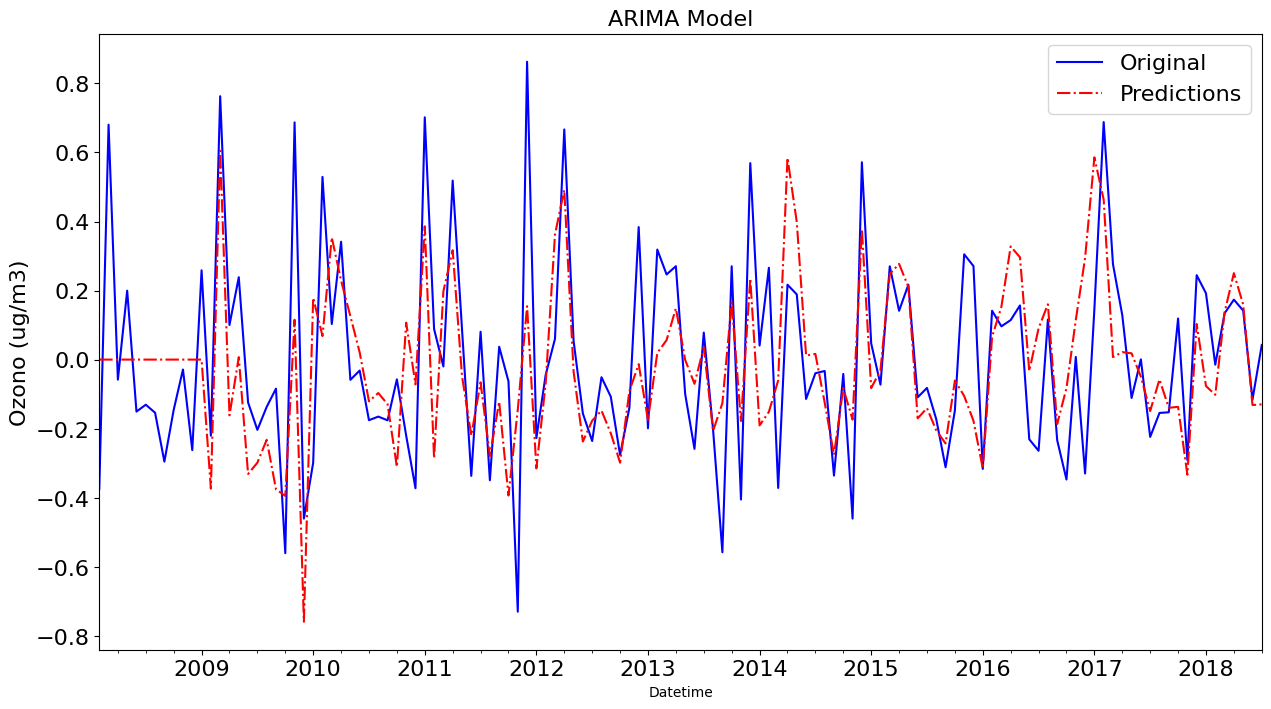

In [76]:
# plot predictions and actual values
train1['O3_log_diff'].plot(label='Original', color='blue', fontsize=16)
result1.fittedvalues.plot( label='Predictions', color='red', fontsize=16, ls='-.', figsize=(15,8))
plt.ylabel("Ozono (ug/m3)", fontsize=16)
plt.title("ARIMA Model", fontsize=16)
plt.legend(loc=1, prop={'size': 16})
plt.show()

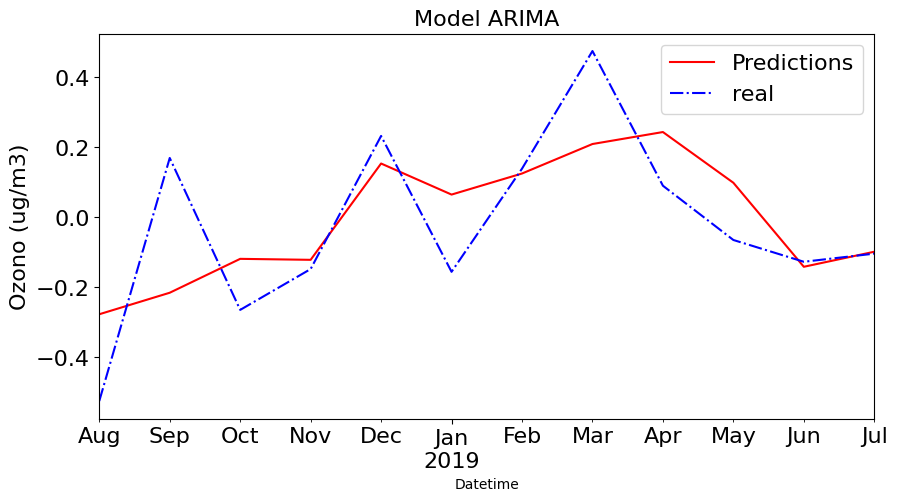

In [77]:
predictions1.plot( color ='red', label='Predictions', figsize = (10,5), fontsize=16)
test1['O3_log_diff'].plot(color = 'blue', ls='-.', label='real',fontsize=16)
plt.ylabel("Ozono (ug/m3)", fontsize=16)
plt.title("Model ARIMA", fontsize=16)
plt.legend(loc=1, prop={'size': 16})
plt.show()

In [78]:
print('MAE:', metrics.mean_absolute_error(test1["O3_log_diff"], predictions1))
print('MSE:', metrics.mean_squared_error(test1["O3_log_diff"], predictions1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test1["O3_log_diff"], predictions1)))

MAE: 0.1434080655602252
MSE: 0.03399270483836501
RMSE: 0.18437110630021453


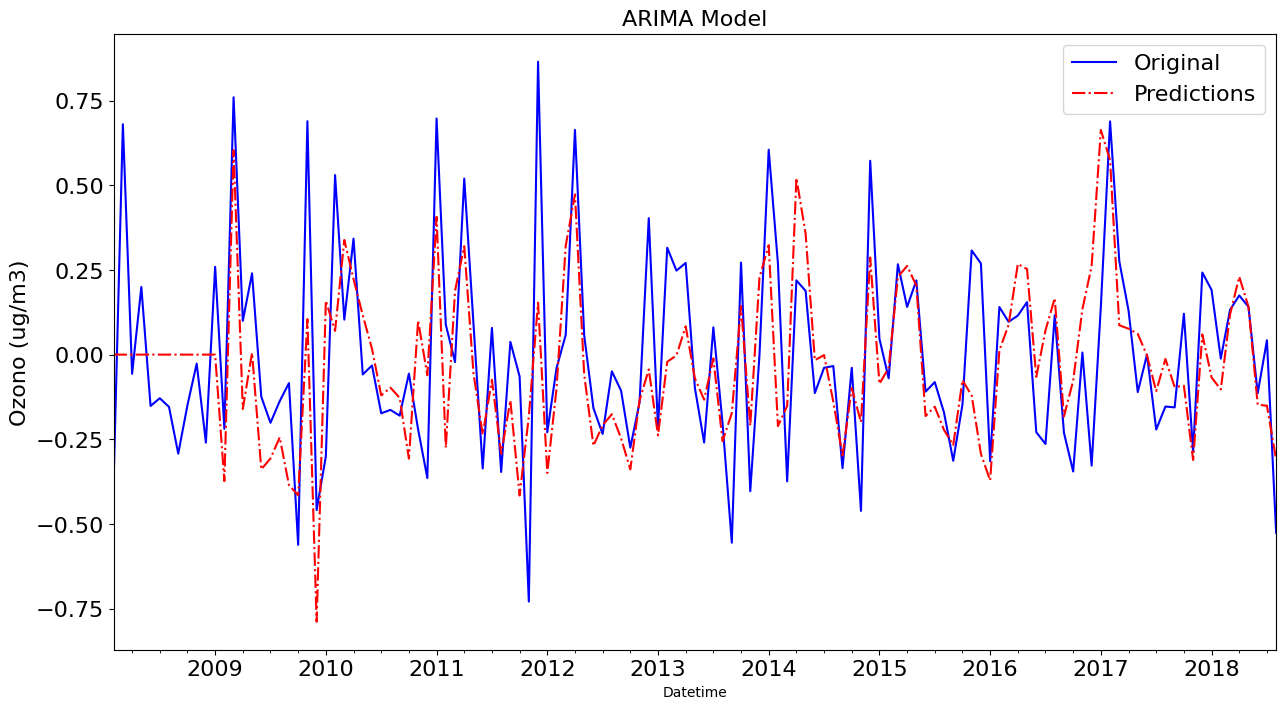

In [79]:
# plot predictions and actual values
train2['O3_log_diff'].plot(label='Original', color='blue', fontsize=16)
result2.fittedvalues.plot( label='Predictions', color='red', fontsize=16, ls='-.', figsize=(15,8))
plt.ylabel("Ozono (ug/m3)", fontsize=16)
plt.title("ARIMA Model", fontsize=16)
plt.legend(loc=1, prop={'size': 16})
plt.show()

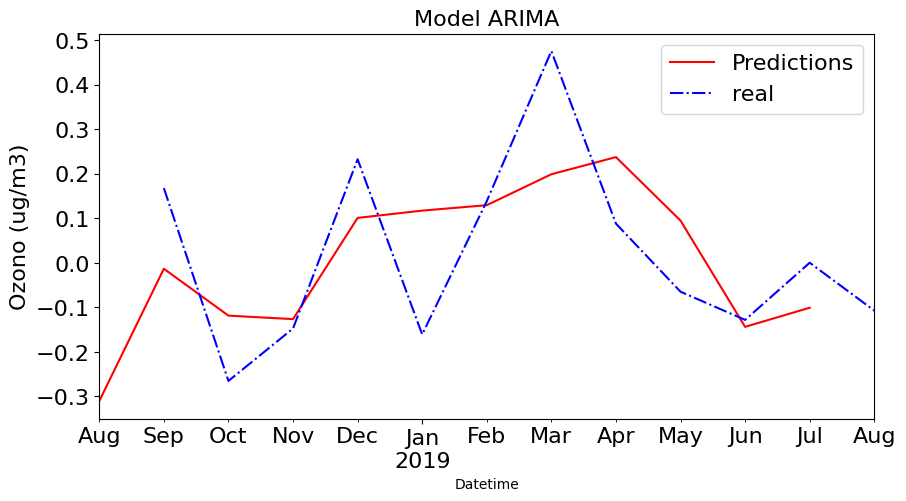

In [80]:
predictions2.plot( color ='red', label='Predictions', figsize = (10,5), fontsize=16)
test2['O3_log_diff'].plot(color = 'blue', ls='-.', label='real',fontsize=16)
plt.ylabel("Ozono (ug/m3)", fontsize=16)
plt.title("Model ARIMA", fontsize=16)
plt.legend(loc=1, prop={'size': 16})
plt.show()

In [81]:
print('MAE:', metrics.mean_absolute_error(test2["O3_log_diff"], predictions2))
print('MSE:', metrics.mean_squared_error(test2["O3_log_diff"], predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test2["O3_log_diff"], predictions2)))

MAE: 0.2110216756329241
MSE: 0.06532147328090394
RMSE: 0.2555806590509226
